In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
store_Locations_dataset = pd.read_excel("Sample Dataset (1).xlsx", sheet_name="Store Locations Sheet")
dataset = pd.read_excel("Sample Dataset (1).xlsx")
dataset = dataset.replace("", float('nan')).fillna(0.0)
dataset['Sales Channel'] = dataset['Sales Channel'].replace("On line", "Online")
dataset['Sales Channel'] = dataset['Sales Channel'].replace("In Store", "In-Store")
dataset_version_1 = dataset
dataset_version_1["Total Price"] = dataset_version_1["Order Quantity"]*dataset_version_1["Unit Price"]
list_of_max_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].max()].index)
for i in list_of_max_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
list_of_min_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()].index)
for i in list_of_min_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
list_of_min_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()].index)
for i in list_of_min_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
dataset_version_1.loc[dataset_version_1["Order Quantity"] == dataset_version_1["Order Quantity"].min(),"Order Quantity"] = 4
dataset_version_1

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181,9815.5
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144,14579.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,229,31,1.0,0.100,998.3,628.929,998.3
7478,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,238,26,3.0,0.100,3932.9,2831.688,11798.7
7479,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,58,5,2.0,0.150,3698.4,3106.656,7396.8
7480,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,113,24,5.0,0.200,1788.9,966.006,8944.5


In [173]:
dataset_version_1.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode',
       'SalesTeam Code', 'Customer Code', 'Store Code', 'Product Code',
       'Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost',
       'Total Price'],
      dtype='object')

In [174]:
store_Locations_dataset.columns

Index(['_StoreID', 'City Name', 'County', 'StateCode', 'State', 'Type',
       'Latitude', 'Longitude', 'AreaCode', 'Population', 'Household Income',
       'Median Income', 'Land Area', 'Water Area', 'Time Zone'],
      dtype='object')

In [175]:
loc_en_dataset = pd.merge(dataset_version_1, store_Locations_dataset, left_on='Store Code', right_on='_StoreID', how='inner')
loc_en_dataset

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,...,Type,Latitude,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,...,City,38.98223,-94.67079,913,186515,74830,72463,194562941,1309517,America/Chicago
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,...,City,42.27087,-83.72633,734,117070,47179,55990,72727009,2254528,America/Detroit
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,...,City,41.30815,-72.92816,203,130322,49771,37192,48407373,3739487,America/New York
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,...,City,41.55815,-73.05150,203,108802,40213,40467,73880017,1086045,America/New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,...,Town,35.78088,-78.81327,919,159769,56034,91579,146322917,2815890,America/New York
7475,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,...,City,46.87719,-96.78980,701,118523,49962,46175,127714801,0,America/Chicago
7476,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,...,City,34.57943,-118.11646,661,158351,42720,52392,274452754,633935,America/Los Angeles
7477,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,...,City,38.90410,-77.01723,202,672228,273390,70848,158364992,18633403,America/New York


In [176]:
loc_en_dataset.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode',
       'SalesTeam Code', 'Customer Code', 'Store Code', 'Product Code',
       'Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost',
       'Total Price', '_StoreID', 'City Name', 'County', 'StateCode', 'State',
       'Type', 'Latitude', 'Longitude', 'AreaCode', 'Population',
       'Household Income', 'Median Income', 'Land Area', 'Water Area',
       'Time Zone'],
      dtype='object')

In [177]:
result = loc_en_dataset.groupby(['City Name', 'Sales Channel'])['Total Price'].sum().reset_index()

# Rename the column to reflect the result
result = result.rename(columns={'Sales': 'Total Sales'})
result

,City Name,Sales Channel,Total Price
0,Abilene,Distributor,46431.0
1,Abilene,In-Store,35831.6
2,Abilene,Online,54899.8
3,Abilene,Wholesale,5038.4
4,Akron,Distributor,17172.1
...,...,...,...
1351,Yonkers,Wholesale,36622.2
1352,York,Distributor,1172.5
1353,York,In-Store,83482.0
1354,York,Online,77619.5


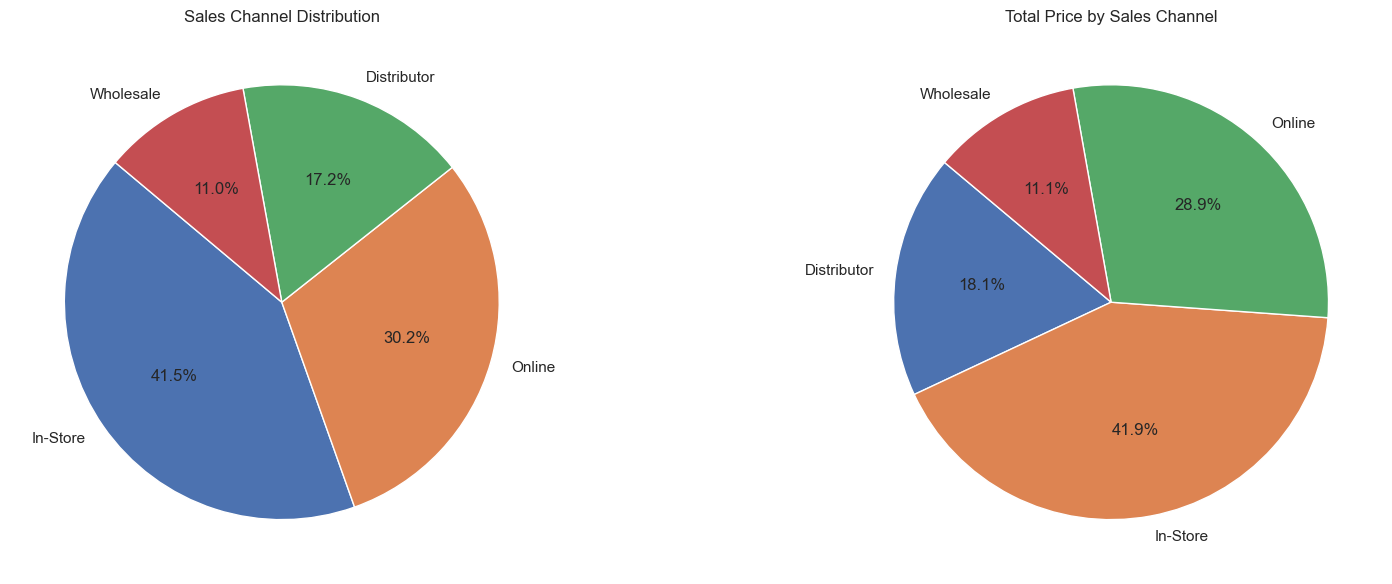

In [178]:
channel_counts = loc_en_dataset['Sales Channel'].value_counts()
price_totals = loc_en_dataset.groupby('Sales Channel')['Total Price'].sum()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


# Plot pie chart for 'Sales Channel'
axes[0].pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Sales Channel Distribution')

# Plot pie chart for 'Total Price' by 'Sales Channel'
axes[1].pie(price_totals, labels=price_totals.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Total Price by Sales Channel')

# Adjust layout
plt.tight_layout()
plt.show()

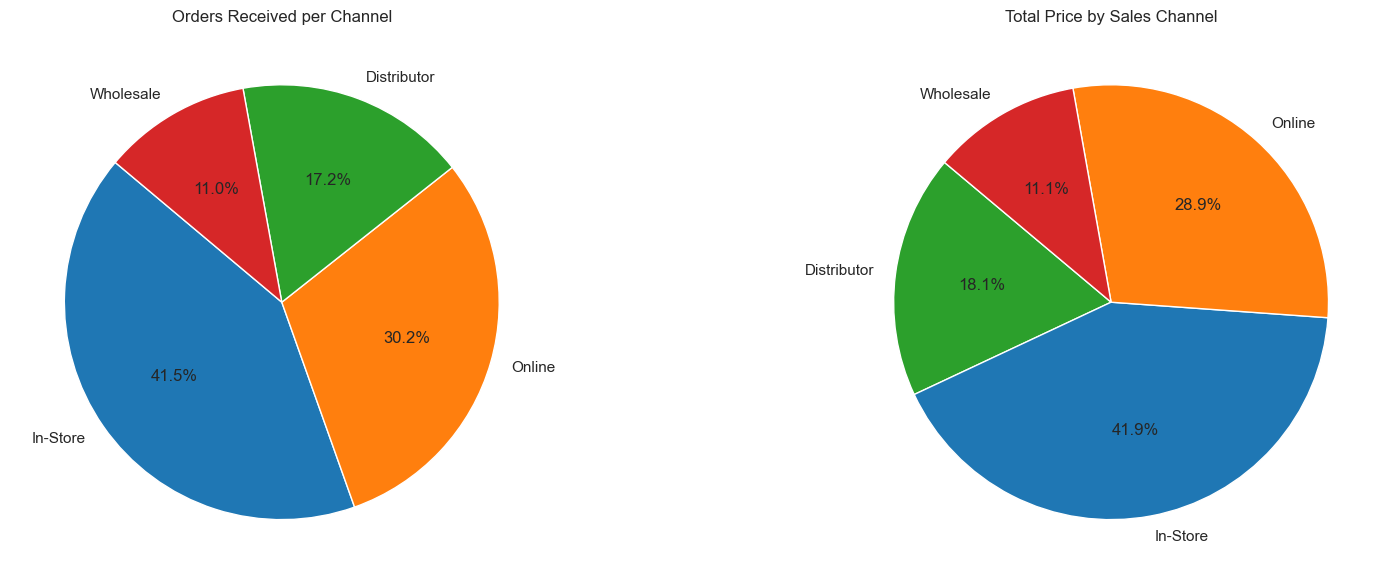

In [179]:

# Count occurrences of each sales channel
channel_counts = loc_en_dataset['Sales Channel'].value_counts()
price_totals = loc_en_dataset.groupby('Sales Channel')['Total Price'].sum()

# Create a color mapping for each sales channel
colors = plt.cm.tab10(range(len(channel_counts)))  # Using a colormap for distinct colors
color_mapping = dict(zip(channel_counts.index, colors))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot pie chart for 'Sales Channel'
axes[0].pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140, colors=[color_mapping[label] for label in channel_counts.index])
axes[0].set_title('Orders Received per Channel')

# Plot pie chart for 'Total Price' by 'Sales Channel'
axes[1].pie(price_totals, labels=price_totals.index, autopct='%1.1f%%', startangle=140, colors=[color_mapping[label] for label in price_totals.index])
axes[1].set_title('Total Price by Sales Channel')

# Adjust layout
plt.tight_layout()
plt.show()


In [180]:
dataset = 'Sample Dataset (1).xlsx'
sheet = pd.read_excel(dataset, sheet_name='Customers Sheet')
sheet["Customer Names"] = sheet["Customer Names"].replace(" ", "Anonymous")
loc_en_dataset1 = pd.merge(loc_en_dataset, sheet, left_on='Customer Code', right_on='_CustomerID', how='inner')
loc_en_dataset1.shape

(7479, 34)

In [181]:
sheet = pd.read_excel(dataset, sheet_name='Products Sheet')
sheet = sheet.dropna(axis=1)
loc_en_dataset2 = pd.merge(loc_en_dataset1, sheet, left_on='Product Code', right_on='ID', how='inner')
loc_en_dataset2.shape

(7479, 36)

In [182]:
sheet = pd.read_excel(dataset, sheet_name='Regions Sheet')
sheet = sheet.dropna(axis=1)
loc_en_dataset3 = pd.merge(loc_en_dataset2, sheet, left_on='StateCode', right_on='StateCode', how='inner')
loc_en_dataset3.shape

(7479, 38)

In [183]:
sheet = pd.read_excel(dataset, sheet_name='Sales Team Demographic')
loc_en_dataset4 = pd.merge(loc_en_dataset3, sheet, left_on='SalesTeam Code', right_on='_SalesTeamID', how='inner')
loc_en_dataset4.shape

(7479, 41)

In [184]:
sheet = pd.read_excel(dataset, sheet_name='Sales Team Sheet')
sheet = sheet.dropna(axis=1)
loc_en_dataset5 = pd.merge(loc_en_dataset4, sheet, left_on='SalesTeam Code', right_on='_SalesTeamID', how='inner')
loc_en_dataset5.shape

(7479, 44)

In [185]:
loc_en_dataset5.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode',
       'SalesTeam Code', 'Customer Code', 'Store Code', 'Product Code',
       'Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost',
       'Total Price', '_StoreID', 'City Name', 'County', 'StateCode',
       'State_x', 'Type', 'Latitude', 'Longitude', 'AreaCode', 'Population',
       'Household Income', 'Median Income', 'Land Area', 'Water Area',
       'Time Zone', '_CustomerID', 'Customer Names', 'ID', 'Product Name',
       'State_y', 'Region_x', '_SalesTeamID_x', 'Sales Team_x', 'Region_y',
       '_SalesTeamID_y', 'Sales Team_y', 'Region'],
      dtype='object')

CurrencyCode, SalesTeam Code, Unit Price, _StoreID, City Name, County, Type, Latitude, Longitude, AreaCode, Land Area, Water Area, Time Zone, 

'WarehouseCode', 'CurrencyCode',
       'SalesTeam Code', 'Customer Code', 'Store Code', 'Product Code', 'County', 'Type', 'Latitude', 'Longitude', 'AreaCode', 'Water Area',
       'Time Zone', '_CustomerID', 'ID', '_SalesTeamID_x', 'City Name', 'StateCode', '_StoreID'

In [186]:
loc_en_dataset6 = loc_en_dataset5.drop(columns=['WarehouseCode', 'CurrencyCode',
       'SalesTeam Code', 'Customer Code', 'Store Code', 'Product Code', 'County', 'Type', 'Latitude', 'Longitude', 'AreaCode', 'Water Area',
       'Time Zone', '_CustomerID', 'ID', '_SalesTeamID_x', 'City Name', 'StateCode', '_StoreID', 'Land Area', 'State_y', 'Sales Team_x', '_SalesTeamID_y', 'Region_y', 'Sales Team_y', 'Region'], inplace=False)
loc_en_dataset6


,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,State_x,Population,Household Income,Median Income,Customer Names,Product Name,Region_x
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,5.0,0.075,1963.1,1001.181,9815.5,New York,213776,68789,80327,Rochester Ltd,Dining Furniture,Northeast
1,SO - 000102,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,3.0,0.075,3939.6,3348.660,11818.8,Kansas,186515,74830,72463,Anonymous,Wreaths,Midwest
2,SO - 000103,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,1.0,0.050,1775.5,781.220,1775.5,Michigan,117070,47179,55990,"3LAB, Ltd",Stemware,Midwest
3,SO - 000104,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,8.0,0.075,2324.9,1464.687,18599.2,Connecticut,130322,49771,37192,"Fenwal, Corp",Accessories,Northeast
4,SO - 000105,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,8.0,0.100,1822.4,1476.144,14579.2,Connecticut,108802,40213,40467,Bare,Candles,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,SO - 0007581,Distributor,2020-06-18,2020-10-31,2020-11-10,2020-11-14,1.0,0.100,998.3,628.929,998.3,North Carolina,159769,56034,91579,Burt's Corp,Candleholders,South
7475,SO - 0007582,In-Store,2020-06-18,2020-10-31,2020-11-05,2020-11-08,3.0,0.100,3932.9,2831.688,11798.7,North Dakota,118523,49962,46175,Avon Corp,Candles,Midwest
7476,SO - 0007583,In-Store,2020-06-18,2020-10-31,2020-11-10,2020-11-16,2.0,0.150,3698.4,3106.656,7396.8,California,158351,42720,52392,Burt's Corp,Bathroom Furniture,West
7477,SO - 0007584,In-Store,2020-06-18,2020-10-31,2020-11-08,2020-11-11,5.0,0.200,1788.9,966.006,8944.5,District of Columbia,672228,273390,70848,Llorens Ltd,Wall Frames,South


In [187]:
loc_en_dataset6.columns

Index(['OrderNumber', 'Sales Channel', 'ProcuredDate', 'OrderDate', 'ShipDate',
       'DeliveryDate', 'Order Quantity', 'Discount Applied', 'Unit Price',
       'Unit Cost', 'Total Price', 'State_x', 'Population', 'Household Income',
       'Median Income', 'Customer Names', 'Product Name', 'Region_x'],
      dtype='object')

In [188]:
loc_en_dataset6

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,State_x,Population,Household Income,Median Income,Customer Names,Product Name,Region_x
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,5.0,0.075,1963.1,1001.181,9815.5,New York,213776,68789,80327,Rochester Ltd,Dining Furniture,Northeast
1,SO - 000102,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,3.0,0.075,3939.6,3348.660,11818.8,Kansas,186515,74830,72463,Anonymous,Wreaths,Midwest
2,SO - 000103,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,1.0,0.050,1775.5,781.220,1775.5,Michigan,117070,47179,55990,"3LAB, Ltd",Stemware,Midwest
3,SO - 000104,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,8.0,0.075,2324.9,1464.687,18599.2,Connecticut,130322,49771,37192,"Fenwal, Corp",Accessories,Northeast
4,SO - 000105,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,8.0,0.100,1822.4,1476.144,14579.2,Connecticut,108802,40213,40467,Bare,Candles,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,SO - 0007581,Distributor,2020-06-18,2020-10-31,2020-11-10,2020-11-14,1.0,0.100,998.3,628.929,998.3,North Carolina,159769,56034,91579,Burt's Corp,Candleholders,South
7475,SO - 0007582,In-Store,2020-06-18,2020-10-31,2020-11-05,2020-11-08,3.0,0.100,3932.9,2831.688,11798.7,North Dakota,118523,49962,46175,Avon Corp,Candles,Midwest
7476,SO - 0007583,In-Store,2020-06-18,2020-10-31,2020-11-10,2020-11-16,2.0,0.150,3698.4,3106.656,7396.8,California,158351,42720,52392,Burt's Corp,Bathroom Furniture,West
7477,SO - 0007584,In-Store,2020-06-18,2020-10-31,2020-11-08,2020-11-11,5.0,0.200,1788.9,966.006,8944.5,District of Columbia,672228,273390,70848,Llorens Ltd,Wall Frames,South


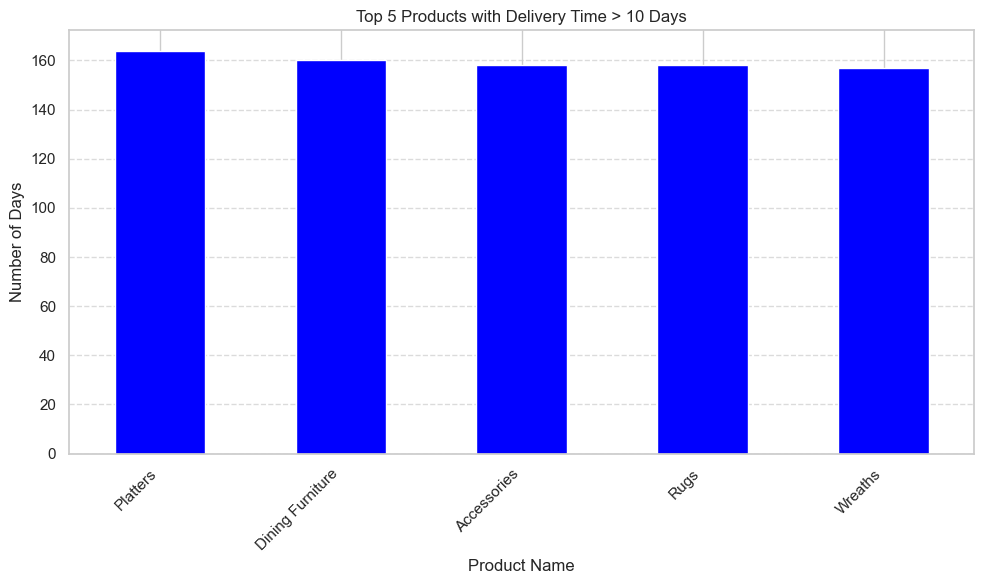

In [189]:
loc_en_dataset6["OrderDate"] = pd.to_datetime(loc_en_dataset6["OrderDate"])
loc_en_dataset6["DeliveryDate"] = pd.to_datetime(loc_en_dataset6["DeliveryDate"])
loc_en_dataset6['Delivery Time (Days)'] = (loc_en_dataset6['DeliveryDate'] - loc_en_dataset6['OrderDate']).dt.days

# Step 2: Filter the orders that take more than 10 days to deliver
long_delivery_orders = loc_en_dataset6[loc_en_dataset6['Delivery Time (Days)'] > 10]

# Step 3: Group by 'Product Name' and count the number of such orders
product_long_delivery_count = long_delivery_orders.groupby('Product Name').size()

# Step 4: Identify the top 5 products with the highest count of such orders
top_5_long_delivery_products = product_long_delivery_count.nlargest(5)

# Step 5: Plot the insights
plt.figure(figsize=(10, 6))
top_5_long_delivery_products.plot(kind='bar', color='blue')
plt.title('Top 5 Products with Delivery Time > 10 Days')
plt.xlabel('Product Name')
plt.ylabel('Number of Days')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\zenda\AppData\Local\Temp\ipykernel_14648\1390793967.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = loc_en_dataset6['Total Price'].resample('M').sum()


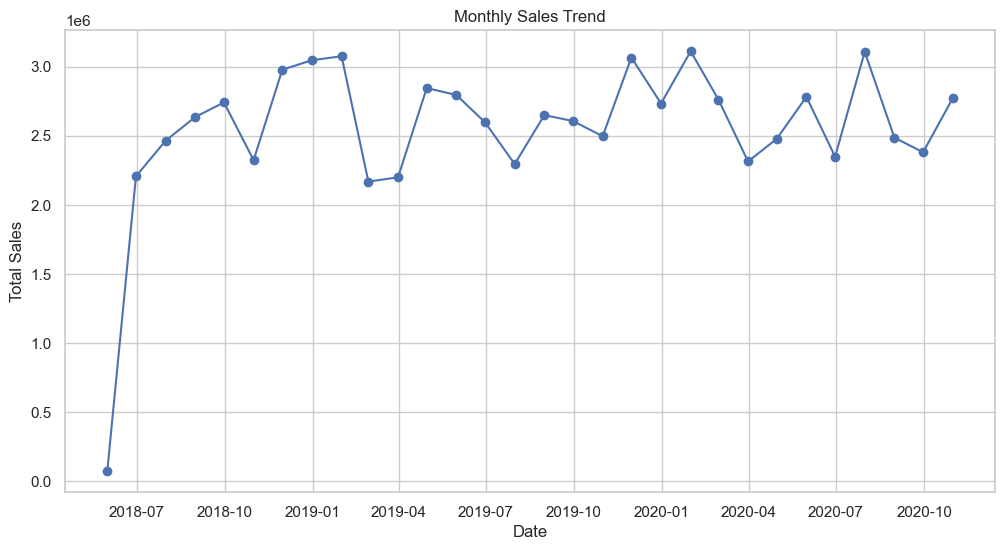

In [190]:
loc_en_dataset6['OrderDate'] = pd.to_datetime(loc_en_dataset6['OrderDate'])

# Set 'OrderDate' as the index
loc_en_dataset6.set_index('OrderDate', inplace=True)

# Resample the data by month and plot the sales trend
monthly_sales = loc_en_dataset6['Total Price'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

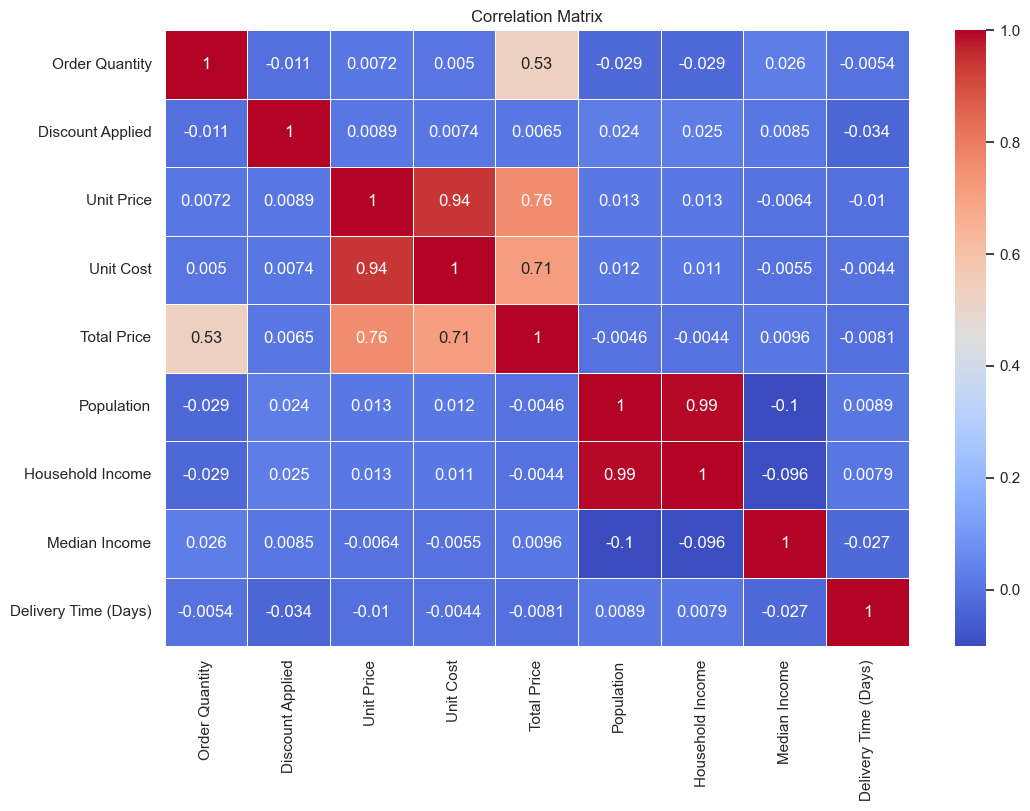

In [191]:
numeric_columns = loc_en_dataset6.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

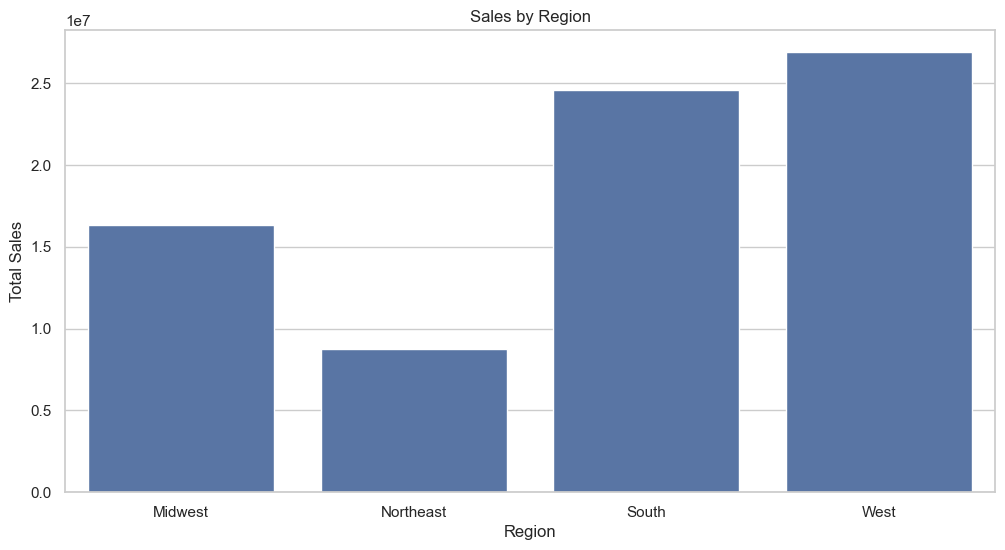

In [192]:
region_sales = loc_en_dataset6.groupby('Region_x')['Total Price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x='Region_x', y='Total Price')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

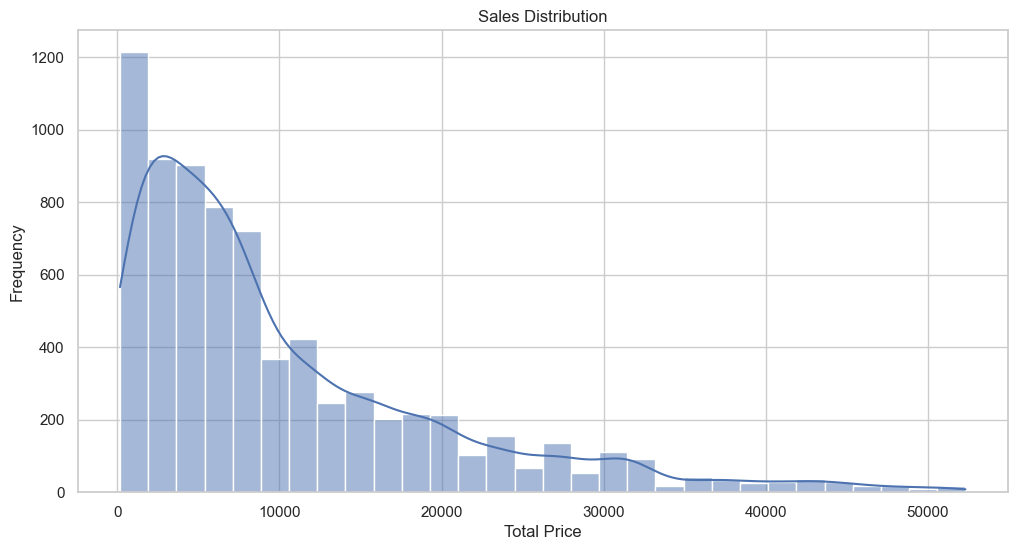

In [193]:
plt.figure(figsize=(12, 6))
sns.histplot(loc_en_dataset6['Total Price'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

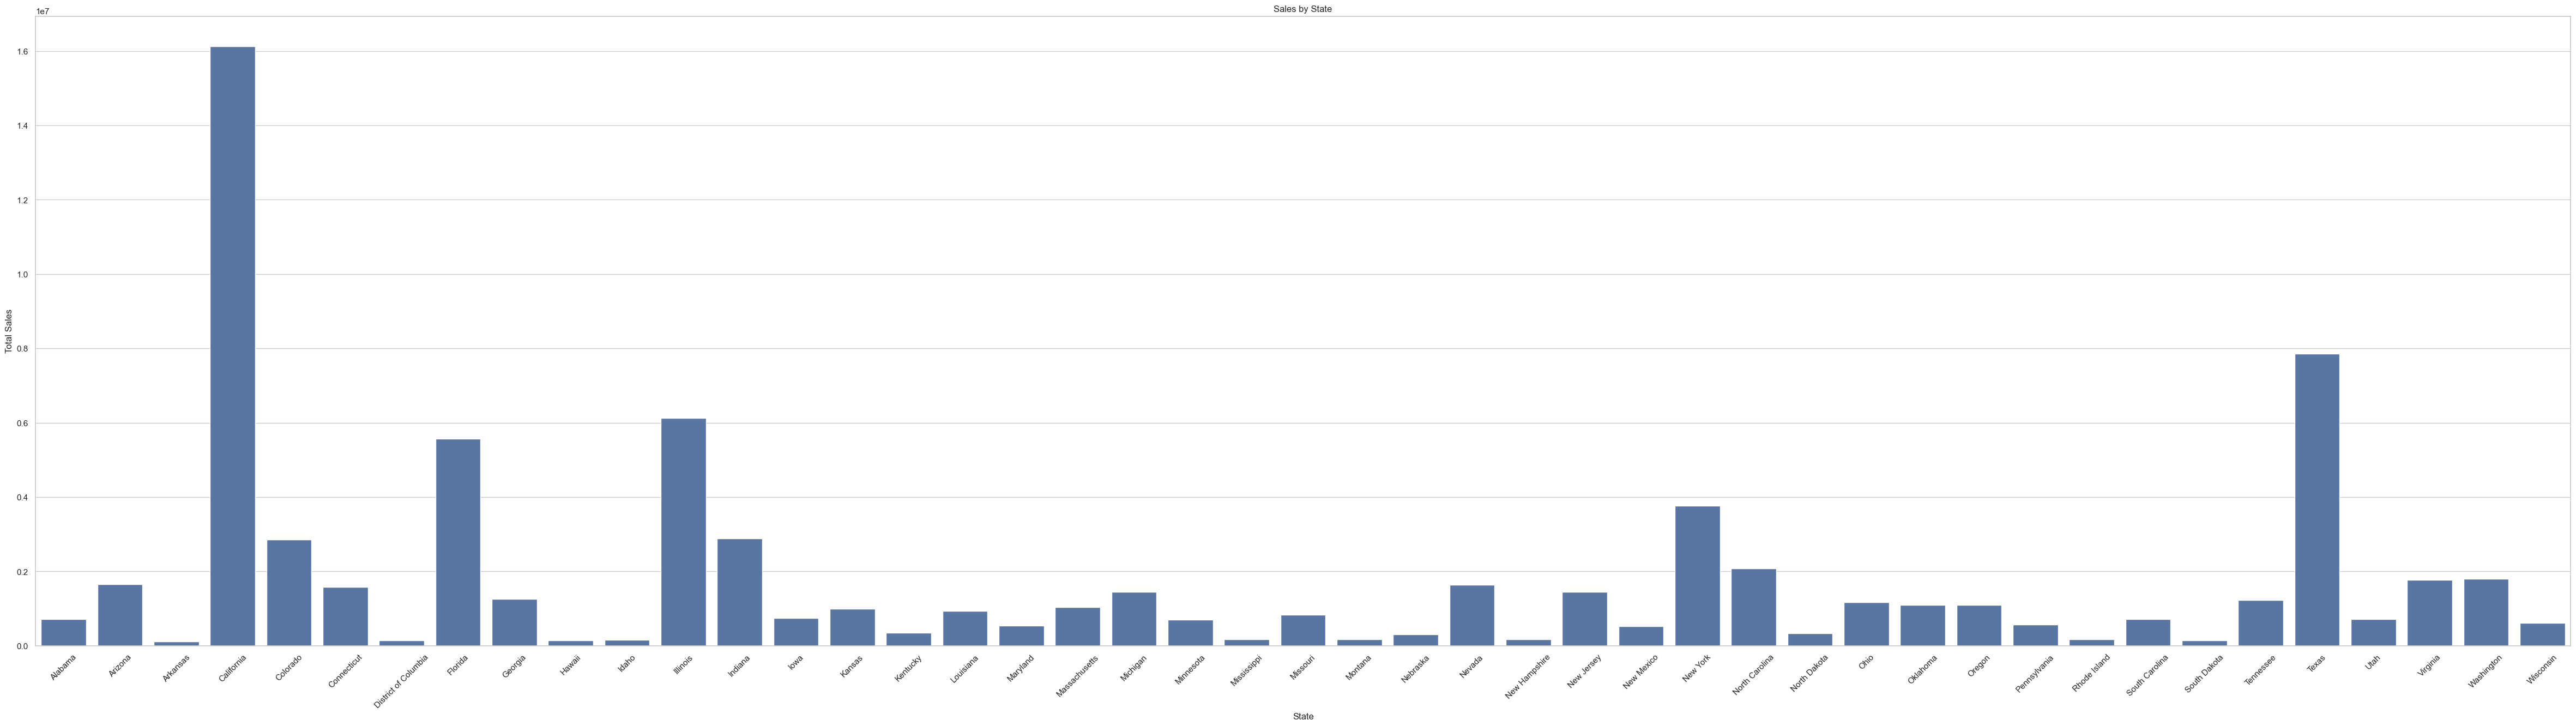

In [194]:
state_sales = loc_en_dataset6.groupby('State_x')['Total Price'].sum().reset_index()

plt.figure(figsize=(60, 15))
sns.barplot(data=state_sales, x='State_x', y='Total Price')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

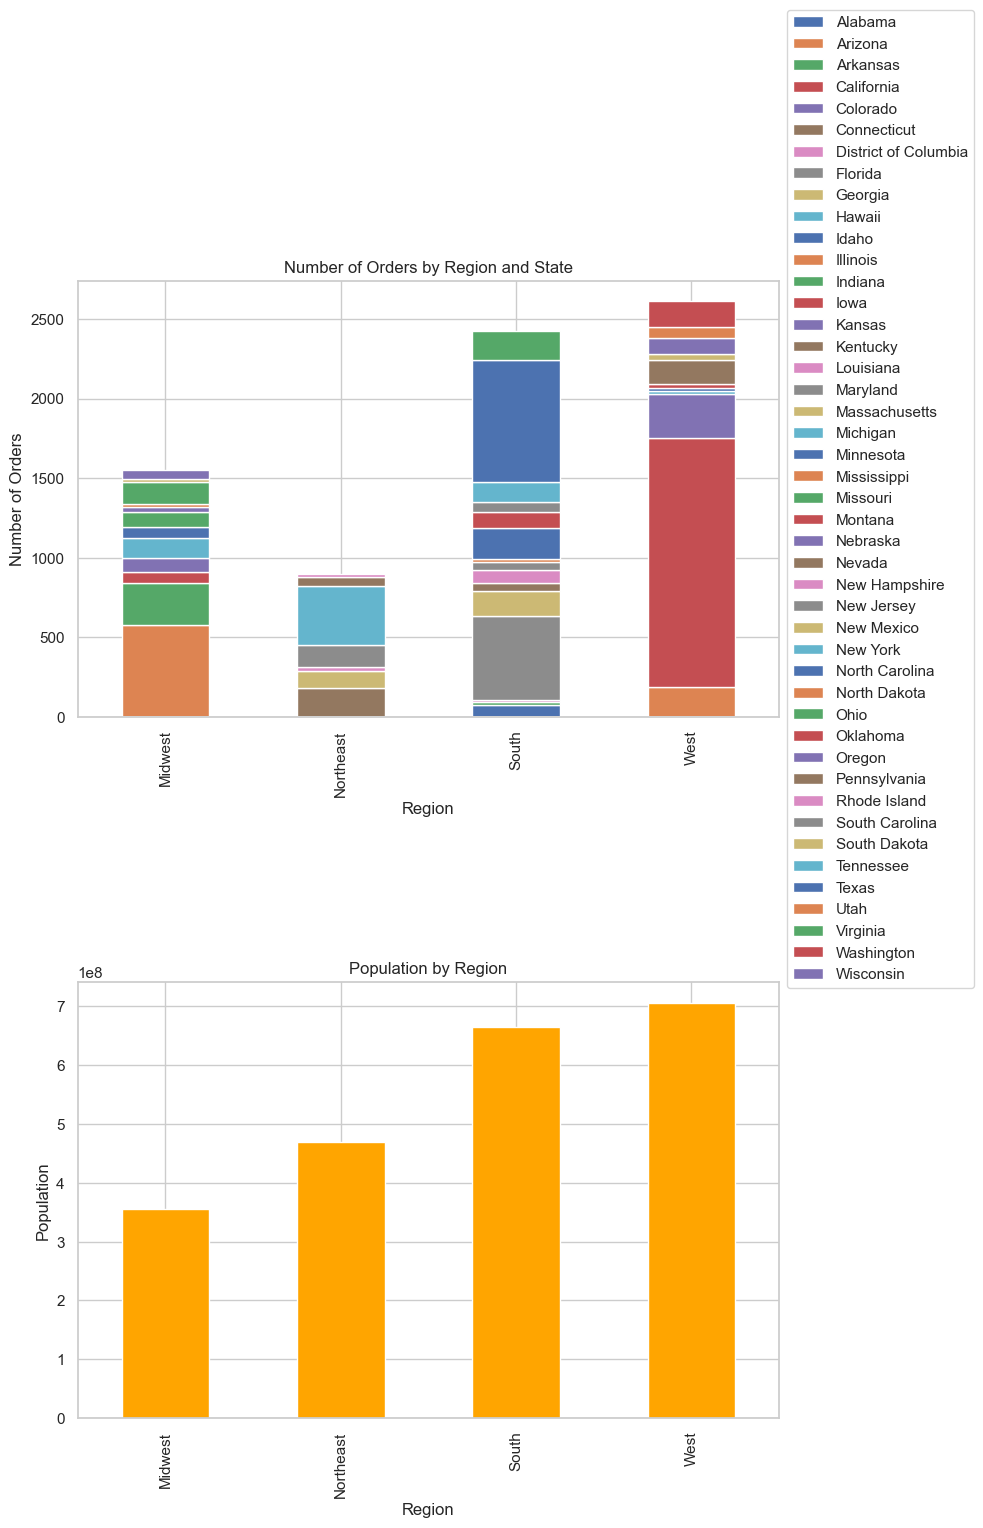

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

order_count = loc_en_dataset6.groupby(['Region_x', 'State_x']).size().unstack(fill_value=0)

population_by_region = loc_en_dataset6.groupby('Region_x')['Population'].sum()

order_count

fig, ax = plt.subplots(2, 1, figsize=(10, 15))

order_count.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Number of Orders by Region and State')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Number of Orders')

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

population_by_region.plot(kind='bar', color='orange', ax=ax[1])
ax[1].set_title('Population by Region')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Population')

plt.tight_layout()
plt.show()



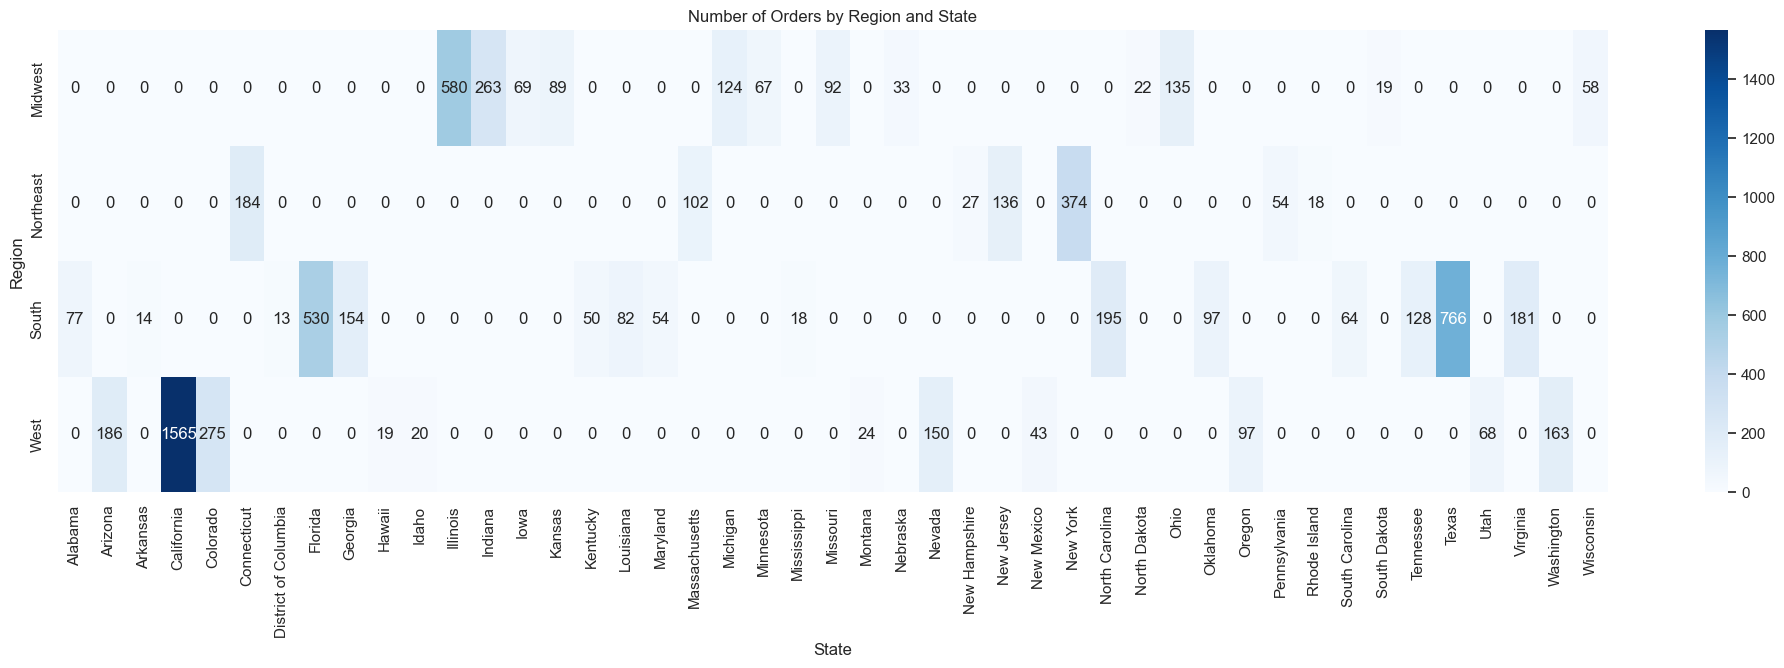

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate the data for the heatmap
heatmap_data = loc_en_dataset6.groupby(['Region_x', 'State_x']).size().unstack(fill_value=0)

# Create the heatmap for number of orders by region and state
plt.figure(figsize=(25, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt="d")
plt.title('Number of Orders by Region and State')
plt.xlabel('State')
plt.ylabel('Region')
plt.show()


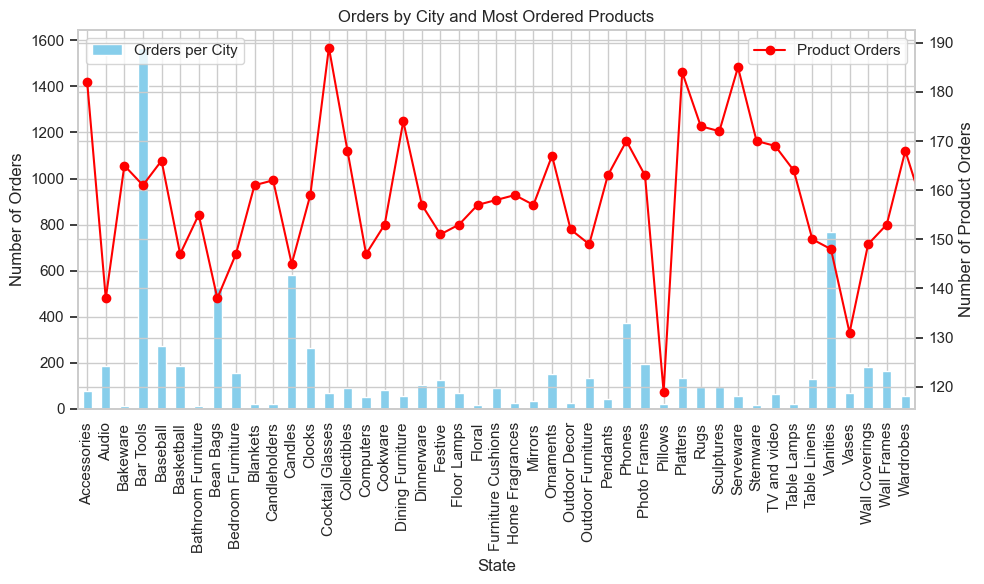

In [197]:
orders_per_city = loc_en_dataset6.groupby('State_x')['OrderNumber'].count()  # Orders by city
products_ordered = loc_en_dataset6.groupby('Product Name')['OrderNumber'].count()  # Most ordered products

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 1: Stacked Bar for Orders per City
orders_per_city.plot(kind='bar', ax=ax1, color='skyblue', label='Orders per City')

# Set labels for the primary y-axis
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Orders')
ax1.set_title('Orders by City and Most Ordered Products')

# Create a second y-axis for the product orders
ax2 = ax1.twinx()

# Plot 2: Line plot for Most Ordered Products on the secondary y-axis
products_ordered.plot(kind='line', marker='o', ax=ax2, color='red', label='Product Orders')

# Set labels for the secondary y-axis
ax2.set_ylabel('Number of Product Orders')

# Add legends for both plots
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()



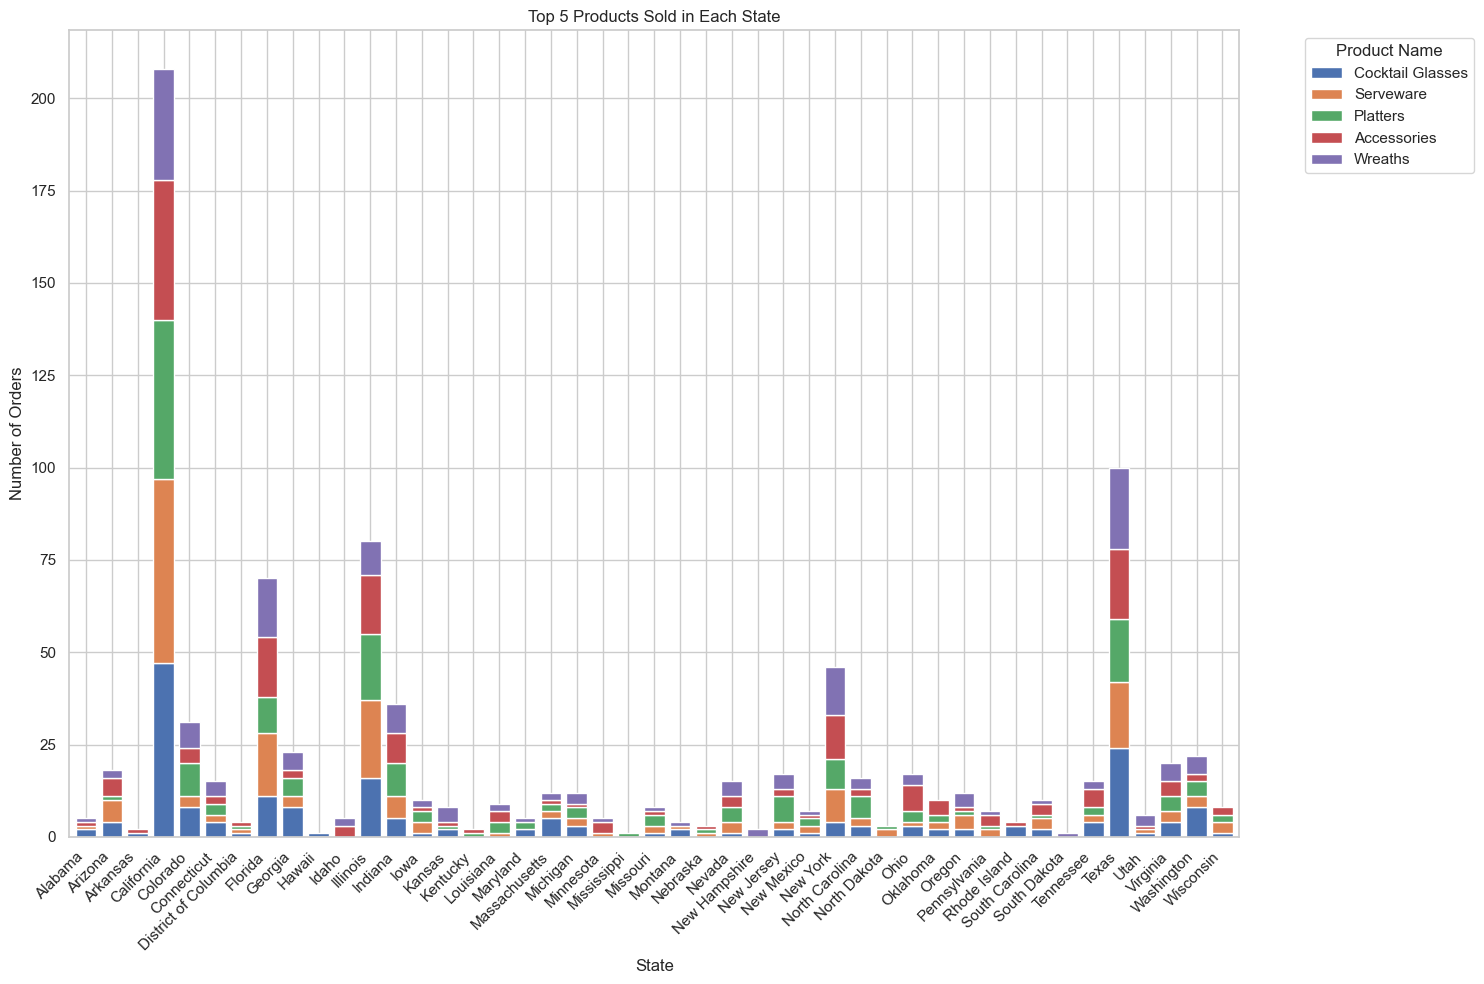

In [198]:
product_state_orders = loc_en_dataset6.groupby(['Product Name', 'State_x']).size().unstack(fill_value=0)

# Sum the orders for each product across all states
total_product_orders = product_state_orders.sum(axis=1)

# Get the top 5 products by total orders
top_5_products = total_product_orders.nlargest(5)

# Filter the original product_state_orders to include only the top 5 products
top_5_product_orders = product_state_orders.loc[top_5_products.index]

# Create subplots
fig, ax = plt.subplots(figsize=(15, 10))

# Plot a bar graph for the top 5 products sold across all states
top_5_product_orders.T.plot(kind='bar', stacked=True, ax=ax, width=0.8)  # Increased width to 0.8

# Add titles and labels
ax.set_title('Top 5 Products Sold in Each State')
ax.set_xlabel('State')
ax.set_ylabel('Number of Orders')

# Rotate x-axis labels (state names) for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend (product names)
ax.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()



In [199]:
loc_en_dataset6.sort_values(by="Unit Price",  ascending=False).head(5)

,OrderNumber,Sales Channel,ProcuredDate,ShipDate,DeliveryDate,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,State_x,Population,Household Income,Median Income,Customer Names,Product Name,Region_x,Delivery Time (Days)
OrderDate,,,,,,,,,,,,,,,,,,
2018-12-26,SO - 0001877,Distributor,2018-10-27,2019-01-03,2019-01-13,3.0,0.15,6566.0,4202.240,19698.0,Texas,249042,90433,44648,Pure Group,Ornaments,South,18
2020-02-16,SO - 0005366,Distributor,2019-12-01,2020-02-26,2020-02-28,3.0,0.30,6559.3,3279.650,19677.9,Connecticut,108802,40213,40467,"3LAB, Ltd",Vanities,Northeast,12
2019-07-29,SO - 0003704,Online,2019-02-04,2019-08-18,2019-08-27,6.0,0.30,6559.3,3345.243,39355.8,Nevada,623747,215614,50202,Ei,Blankets,West,29
2019-10-31,SO - 0004451,Wholesale,2019-08-23,2019-11-10,2019-11-17,1.0,0.30,6559.3,5444.219,6559.3,Illinois,116565,50575,49868,21st Ltd,Blankets,Midwest,17
2019-09-12,SO - 0004064,In-Store,2019-05-15,2019-09-23,2019-09-29,5.0,0.05,6559.3,4132.359,32796.5,California,265757,78066,65185,"3LAB, Ltd",Pendants,West,17


In [200]:
loc_en_dataset6.sort_values(by="Total Price",  ascending=False).head(5)

,OrderNumber,Sales Channel,ProcuredDate,ShipDate,DeliveryDate,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,State_x,Population,Household Income,Median Income,Customer Names,Product Name,Region_x,Delivery Time (Days)
OrderDate,,,,,,,,,,,,,,,,,,
2018-07-04,SO - 000385,In-Store,2017-12-31,2018-07-14,2018-07-23,8.0,0.05,6539.2,3858.128,52313.6,Indiana,862781,316037,51682,Medline,Accessories,Midwest,19
2020-07-31,SO - 0006797,Online,2020-03-10,2020-08-13,2020-08-20,8.0,0.15,6525.8,3589.190,52206.4,California,207460,49975,64824,Eminence Corp,Dinnerware,West,20
2018-11-01,SO - 0001389,Distributor,2018-07-19,2018-11-14,2018-11-24,8.0,0.10,6505.7,4944.332,52045.6,California,113204,40908,66459,Ole Group,Furniture Cushions,West,23
2020-09-21,SO - 0007235,Distributor,2020-06-18,2020-10-11,2020-10-21,8.0,0.40,6492.3,3895.380,51938.4,Texas,236607,83649,52154,Weimei Corp,Dining Furniture,South,30
2019-06-11,SO - 0003316,In-Store,2019-02-04,2019-06-28,2019-06-30,8.0,0.05,6478.9,4923.964,51831.2,Illinois,115070,47239,45552,Ohio,Basketball,Midwest,19


In [201]:
# temp_df = loc_en_dataset6[["State_x", "Product Name", "Total Price"]].sort_values(by="Total Price",  ascending=False)
temp_df = loc_en_dataset6[["Product Name", "Discount Applied", "Total Price"]].sort_values(by="Total Price",  ascending=False)
temp_df["Payable Price"] = temp_df["Total Price"]-(temp_df["Total Price"]*temp_df["Discount Applied"])
temp_df
# temp_df.groupby("State_x").agg({
#     "Product Name":"first",
#     "Total Price":"mean"
# })

,Product Name,Discount Applied,Total Price,Payable Price
OrderDate,,,,
2018-07-04,Accessories,0.050,52313.6,49697.9200
2020-07-31,Dinnerware,0.150,52206.4,44375.4400
2018-11-01,Furniture Cushions,0.100,52045.6,46841.0400
2020-09-21,Dining Furniture,0.400,51938.4,31163.0400
2019-06-11,Basketball,0.050,51831.2,49239.6400
...,...,...,...,...
2018-07-25,Cocktail Glasses,0.075,167.5,154.9375
2020-09-15,Dinnerware,0.200,167.5,134.0000
2020-07-30,Clocks,0.400,167.5,100.5000


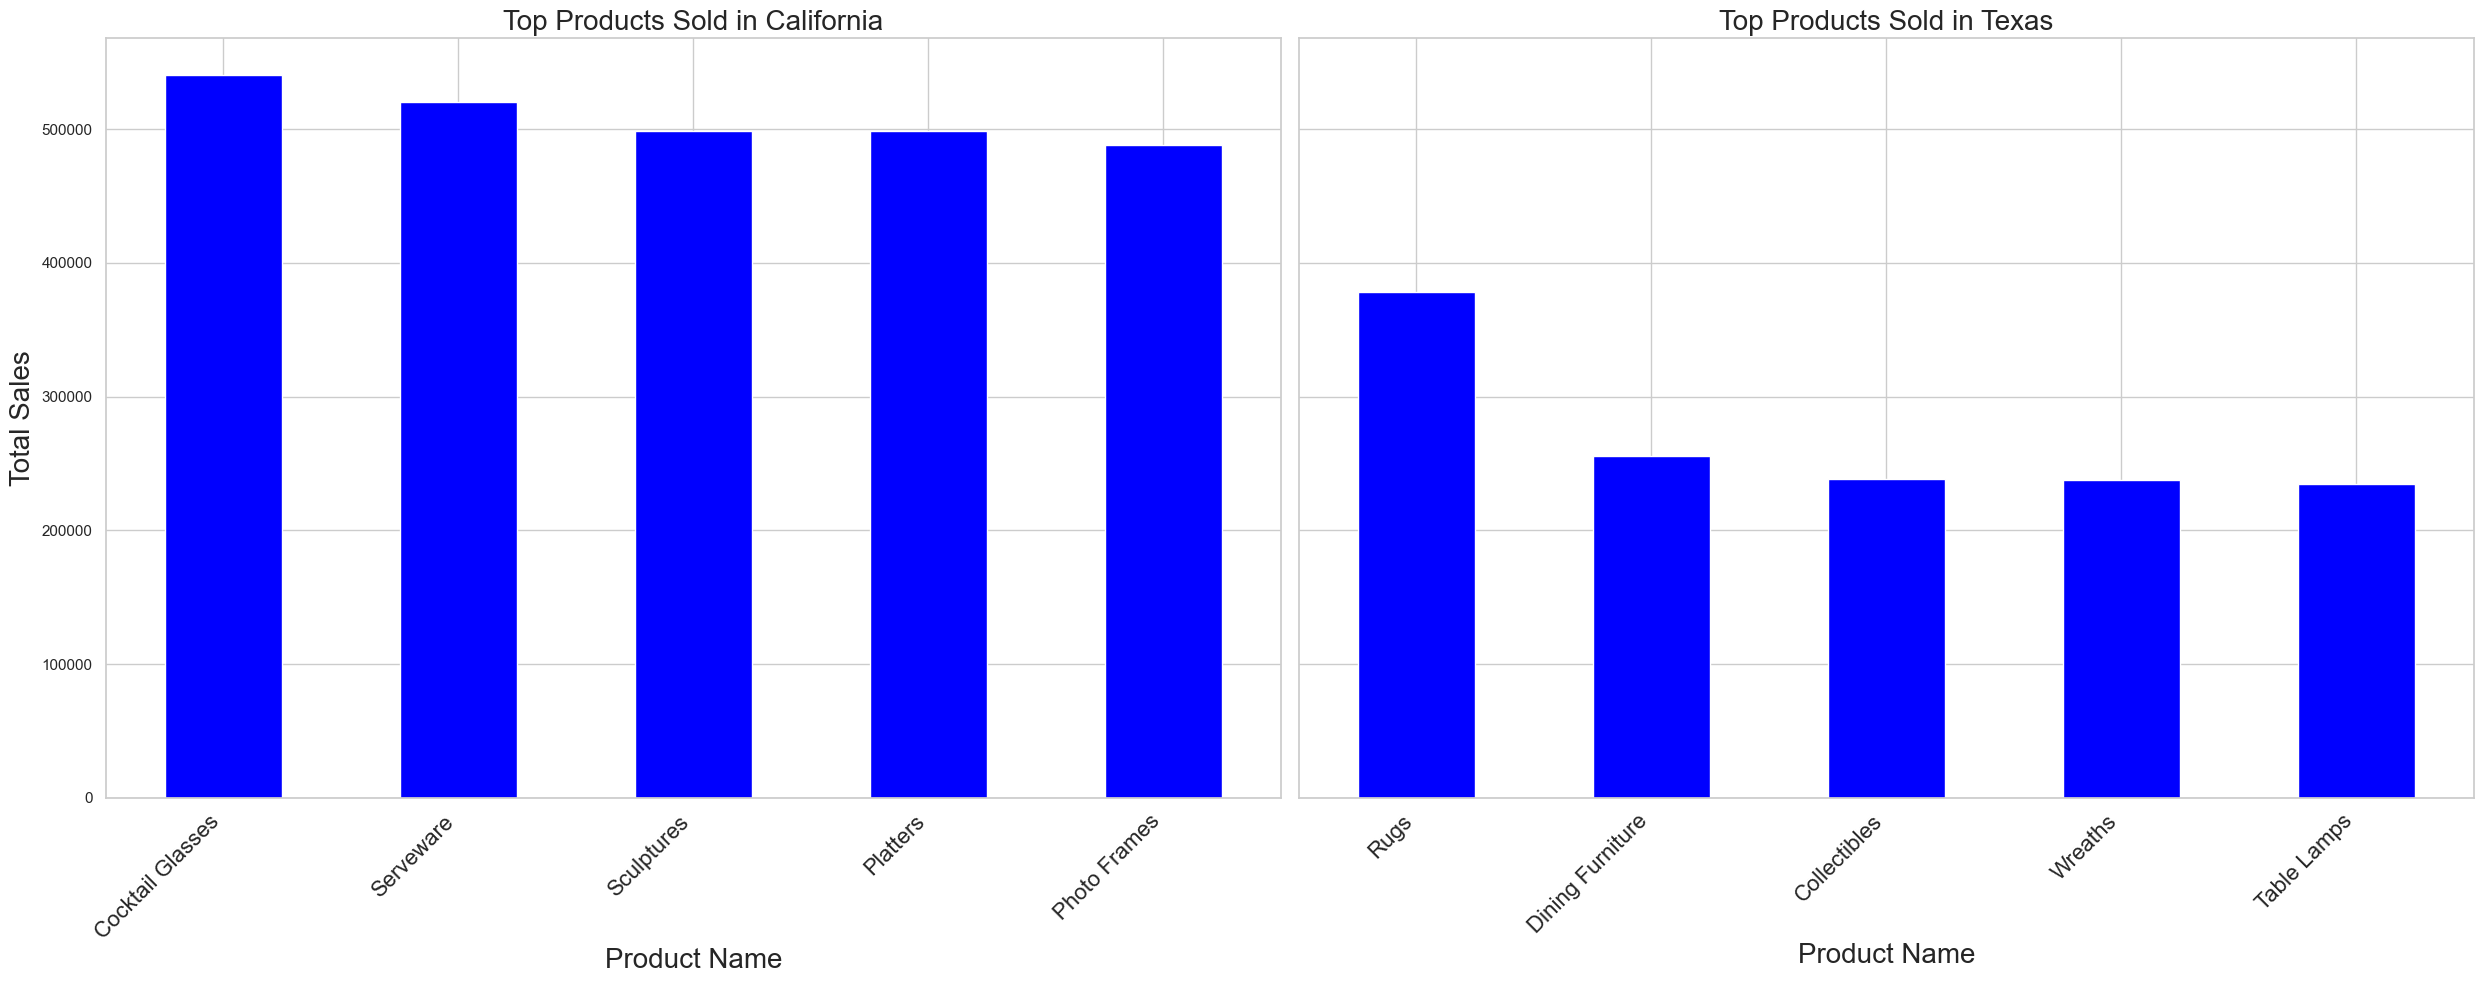

In [202]:
state_sales = loc_en_dataset6.groupby('State_x')['Total Price'].sum()

# Step 2: Identify the top two states by total sales
top_2_states = state_sales.nlargest(2).index

# Step 3: Filter the dataset for the top two states
top_2_states_data = loc_en_dataset6[loc_en_dataset6['State_x'].isin(top_2_states)]

# Step 4: Calculate total sales for each product in each of the top two states
product_sales_in_top_2_states = top_2_states_data.groupby(['Product Name', 'State_x'])['Total Price'].sum().unstack(fill_value=0)

# Step 5: Plot the insights in separate graphs for each state
fig, axes = plt.subplots(1, 2, figsize=(25, 10), sharey=True)

for i, state in enumerate(top_2_states):
    # Get the sales data for the current state
    state_product_sales = product_sales_in_top_2_states[state].nlargest(5)
    
    # Plot the sales data
    state_product_sales.plot(kind='bar', ax=axes[i], color='blue')
    axes[i].set_title(f'Top Products Sold in {state}', fontsize=20)
    axes[i].set_xlabel('Product Name', fontsize=20)
    axes[i].set_ylabel('Total Sales', fontsize=20)
    axes[i].set_xticklabels(state_product_sales.index, rotation=45, ha='right', fontsize=16)

plt.tight_layout()
plt.show()

In [203]:
state_sales = loc_en_dataset6.groupby('State_x')['Total Price'].sum()

# Step 2: Identify the state with the lowest total sales
state_with_lowest_sales = state_sales.idxmin()
lowest_sales_amount = state_sales.min()

print(f"The state with the lowest sales is {state_with_lowest_sales} with total sales of {lowest_sales_amount}.")

The state with the lowest sales is Arkansas with total sales of 110677.3.


In [204]:
loc_en_dataset6

,OrderNumber,Sales Channel,ProcuredDate,ShipDate,DeliveryDate,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,State_x,Population,Household Income,Median Income,Customer Names,Product Name,Region_x,Delivery Time (Days)
OrderDate,,,,,,,,,,,,,,,,,,
2018-05-31,SO - 000101,In-Store,2017-12-31,2018-06-14,2018-06-19,5.0,0.075,1963.1,1001.181,9815.5,New York,213776,68789,80327,Rochester Ltd,Dining Furniture,Northeast,19
2018-05-31,SO - 000102,Online,2017-12-31,2018-06-22,2018-07-02,3.0,0.075,3939.6,3348.660,11818.8,Kansas,186515,74830,72463,Anonymous,Wreaths,Midwest,32
2018-05-31,SO - 000103,Distributor,2017-12-31,2018-06-21,2018-07-01,1.0,0.050,1775.5,781.220,1775.5,Michigan,117070,47179,55990,"3LAB, Ltd",Stemware,Midwest,31
2018-05-31,SO - 000104,Wholesale,2017-12-31,2018-06-02,2018-06-07,8.0,0.075,2324.9,1464.687,18599.2,Connecticut,130322,49771,37192,"Fenwal, Corp",Accessories,Northeast,7
2018-05-31,SO - 000105,Distributor,2018-04-10,2018-06-16,2018-06-26,8.0,0.100,1822.4,1476.144,14579.2,Connecticut,108802,40213,40467,Bare,Candles,Northeast,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,SO - 0007581,Distributor,2020-06-18,2020-11-10,2020-11-14,1.0,0.100,998.3,628.929,998.3,North Carolina,159769,56034,91579,Burt's Corp,Candleholders,South,14
2020-10-31,SO - 0007582,In-Store,2020-06-18,2020-11-05,2020-11-08,3.0,0.100,3932.9,2831.688,11798.7,North Dakota,118523,49962,46175,Avon Corp,Candles,Midwest,8
2020-10-31,SO - 0007583,In-Store,2020-06-18,2020-11-10,2020-11-16,2.0,0.150,3698.4,3106.656,7396.8,California,158351,42720,52392,Burt's Corp,Bathroom Furniture,West,16


The state with the lowest sales is District of Columbia with total Orders of 62.0.


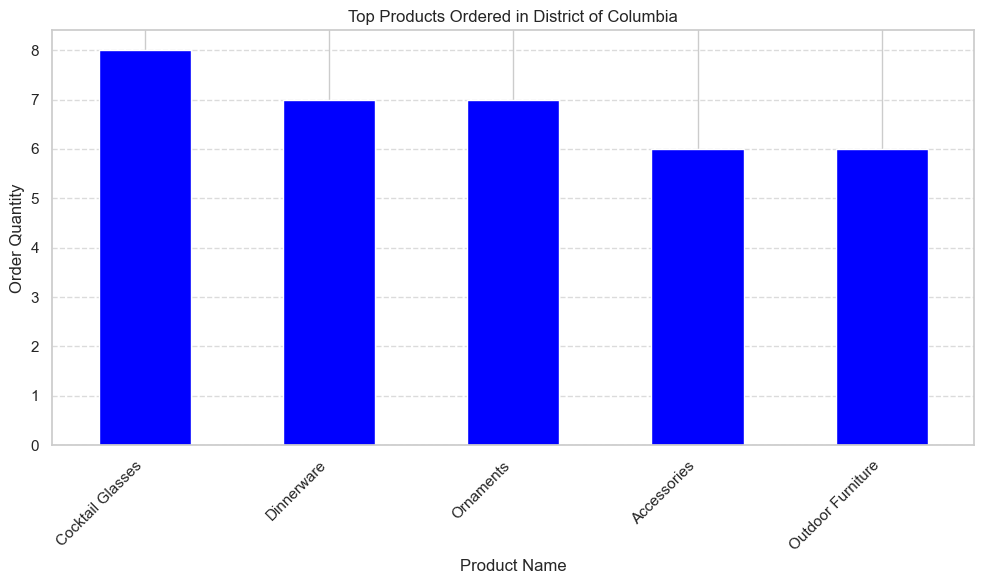

In [205]:
state_sales = loc_en_dataset6.groupby('State_x')['Order Quantity'].sum()

# Step 2: Identify the state with the lowest total sales
state_with_lowest_sales = state_sales.idxmin()
lowest_sales_amount = state_sales.min()

print(f"The state with the lowest sales is {state_with_lowest_sales} with total Orders of {lowest_sales_amount}.")

# Step 3: Filter the dataset for the least performing state
least_performing_state_data = loc_en_dataset6[loc_en_dataset6['State_x'] == state_with_lowest_sales]

# Step 4: Calculate total sales for each product in the least performing state
product_sales_in_least_state = least_performing_state_data.groupby('Product Name')['Order Quantity'].sum()

# Step 5: Identify the top products sold in the least performing state
top_products_in_least_state = product_sales_in_least_state.nlargest(5)

# Step 6: Plot the insights
plt.figure(figsize=(10, 6))
top_products_in_least_state.plot(kind='bar', color='blue')
plt.title(f'Top Products Ordered in {state_with_lowest_sales}')
plt.xlabel('Product Name')
plt.ylabel('Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

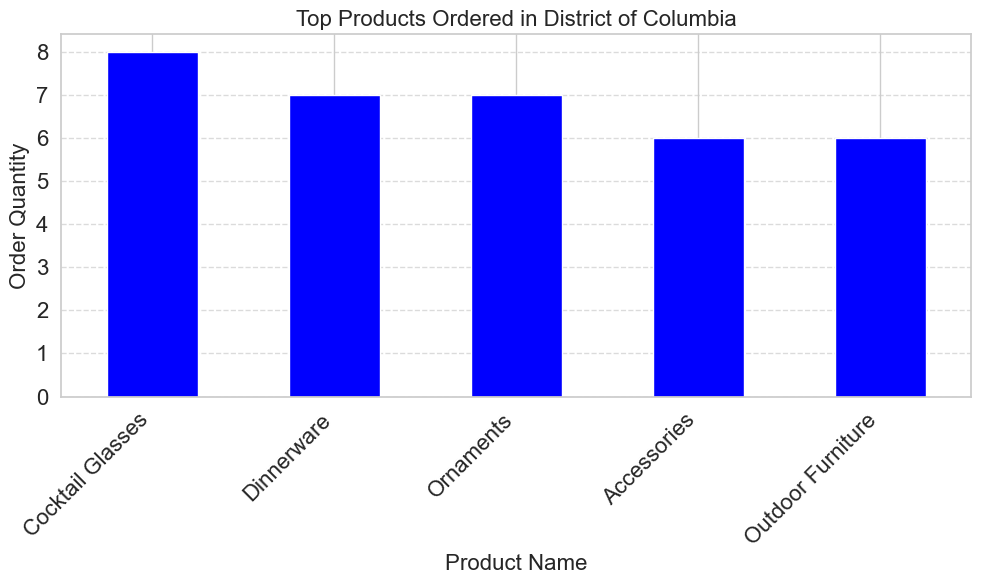

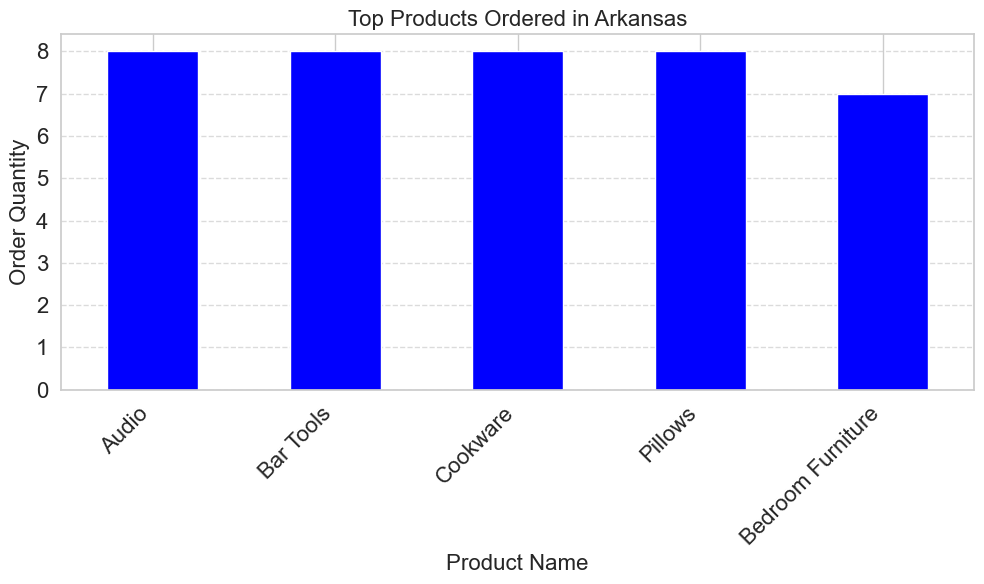

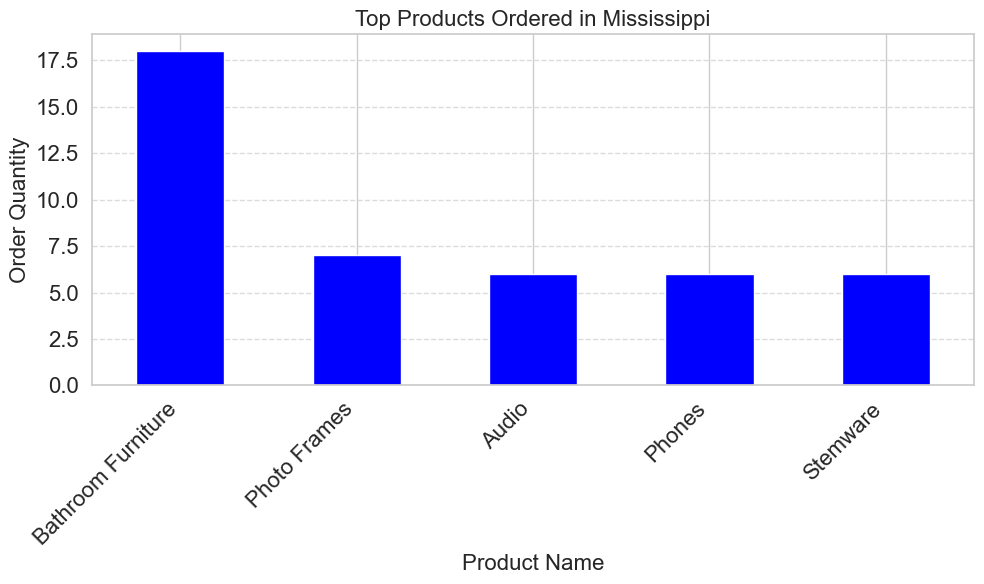

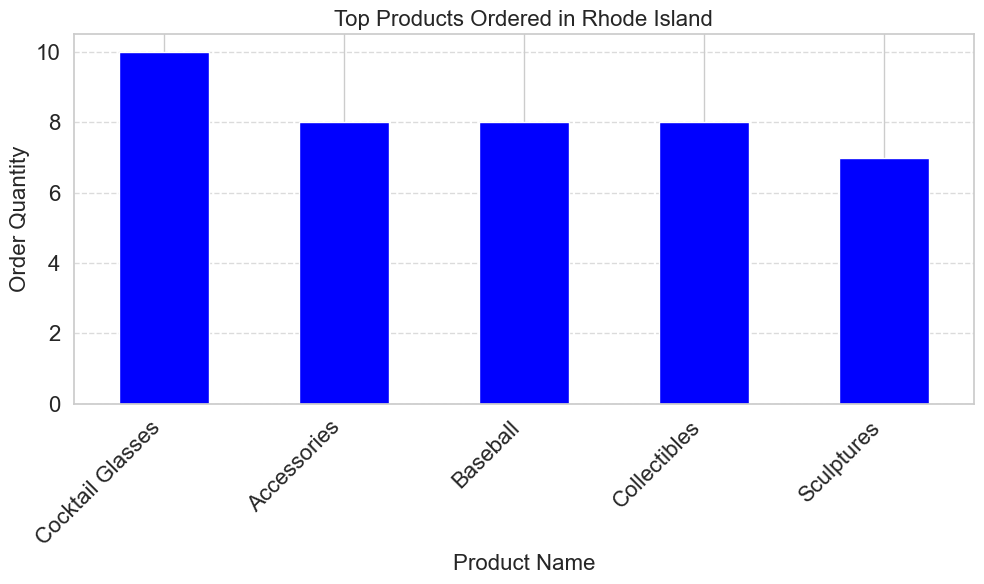

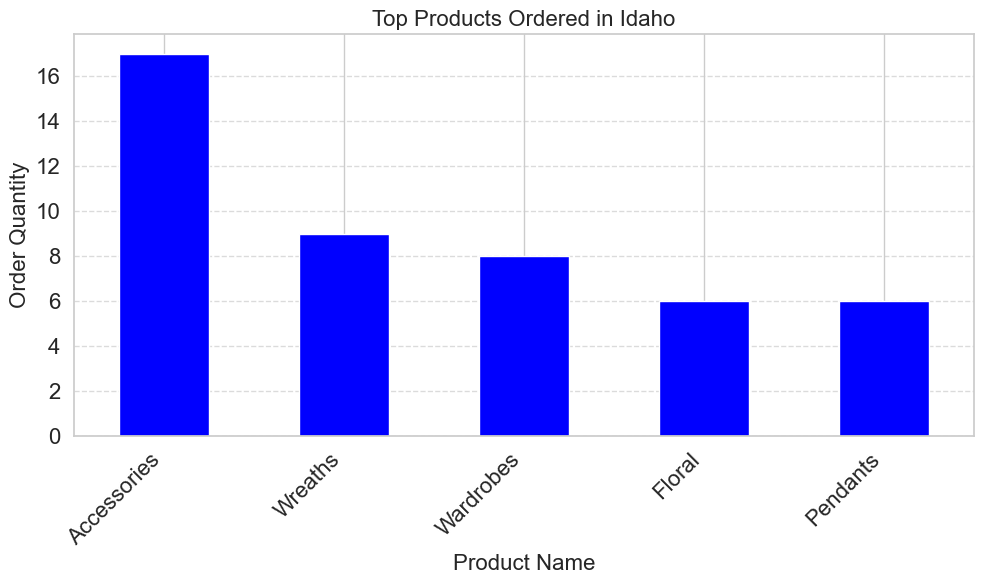

In [206]:
state_sales = loc_en_dataset6.groupby('State_x')['Order Quantity'].sum()

# Step 2: Identify the least 5 states by total sales
least_5_states = state_sales.nsmallest(5).index

# Step 3: Filter the dataset for the least 5 states
least_5_states_data = loc_en_dataset6[loc_en_dataset6['State_x'].isin(least_5_states)]

# Step 4: Calculate total sales for each product in each of the least 5 states
product_sales_in_least_5_states = least_5_states_data.groupby(['Product Name', 'State_x'])['Order Quantity'].sum().unstack(fill_value=0)

# Step 5: Plot the insights in separate graphs for each state
for state in least_5_states:
    # Get the sales data for the current state
    state_product_sales = product_sales_in_least_5_states[state].nlargest(5)
    
    # Plot the sales data
    plt.figure(figsize=(10, 6))
    state_product_sales.plot(kind='bar', color='blue')
    plt.title(f'Top Products Ordered in {state}', fontsize=16)
    plt.xlabel('Product Name', fontsize=16)
    plt.ylabel('Order Quantity', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [207]:
loc_en_dataset6 = loc_en_dataset5.drop(columns=['WarehouseCode', 'CurrencyCode',
       'SalesTeam Code', 'Customer Code', 'Store Code', 'Product Code', 'County', 'Type', 'Latitude', 'Longitude', 'AreaCode', 'Water Area',
       'Time Zone', '_CustomerID', 'ID', '_SalesTeamID_x', 'City Name', 'StateCode', '_StoreID', 'Land Area', 'State_y', 'Sales Team_x', '_SalesTeamID_y', 'Region_y', 'Sales Team_y', 'Region'], inplace=False)
loc_en_dataset6

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,State_x,Population,Household Income,Median Income,Customer Names,Product Name,Region_x
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,5.0,0.075,1963.1,1001.181,9815.5,New York,213776,68789,80327,Rochester Ltd,Dining Furniture,Northeast
1,SO - 000102,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,3.0,0.075,3939.6,3348.660,11818.8,Kansas,186515,74830,72463,Anonymous,Wreaths,Midwest
2,SO - 000103,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,1.0,0.050,1775.5,781.220,1775.5,Michigan,117070,47179,55990,"3LAB, Ltd",Stemware,Midwest
3,SO - 000104,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,8.0,0.075,2324.9,1464.687,18599.2,Connecticut,130322,49771,37192,"Fenwal, Corp",Accessories,Northeast
4,SO - 000105,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,8.0,0.100,1822.4,1476.144,14579.2,Connecticut,108802,40213,40467,Bare,Candles,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,SO - 0007581,Distributor,2020-06-18,2020-10-31,2020-11-10,2020-11-14,1.0,0.100,998.3,628.929,998.3,North Carolina,159769,56034,91579,Burt's Corp,Candleholders,South
7475,SO - 0007582,In-Store,2020-06-18,2020-10-31,2020-11-05,2020-11-08,3.0,0.100,3932.9,2831.688,11798.7,North Dakota,118523,49962,46175,Avon Corp,Candles,Midwest
7476,SO - 0007583,In-Store,2020-06-18,2020-10-31,2020-11-10,2020-11-16,2.0,0.150,3698.4,3106.656,7396.8,California,158351,42720,52392,Burt's Corp,Bathroom Furniture,West
7477,SO - 0007584,In-Store,2020-06-18,2020-10-31,2020-11-08,2020-11-11,5.0,0.200,1788.9,966.006,8944.5,District of Columbia,672228,273390,70848,Llorens Ltd,Wall Frames,South


In [208]:
x = loc_en_dataset6["DeliveryDate"]-loc_en_dataset6["OrderDate"]
loc_en_dataset6.insert(loc=18, value=x, column="Delivery Delay")
loc_en_dataset6

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,State_x,Population,Household Income,Median Income,Customer Names,Product Name,Region_x,Delivery Delay
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,5.0,0.075,1963.1,1001.181,9815.5,New York,213776,68789,80327,Rochester Ltd,Dining Furniture,Northeast,19 days
1,SO - 000102,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,3.0,0.075,3939.6,3348.660,11818.8,Kansas,186515,74830,72463,Anonymous,Wreaths,Midwest,32 days
2,SO - 000103,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,1.0,0.050,1775.5,781.220,1775.5,Michigan,117070,47179,55990,"3LAB, Ltd",Stemware,Midwest,31 days
3,SO - 000104,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,8.0,0.075,2324.9,1464.687,18599.2,Connecticut,130322,49771,37192,"Fenwal, Corp",Accessories,Northeast,7 days
4,SO - 000105,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,8.0,0.100,1822.4,1476.144,14579.2,Connecticut,108802,40213,40467,Bare,Candles,Northeast,26 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,SO - 0007581,Distributor,2020-06-18,2020-10-31,2020-11-10,2020-11-14,1.0,0.100,998.3,628.929,998.3,North Carolina,159769,56034,91579,Burt's Corp,Candleholders,South,14 days
7475,SO - 0007582,In-Store,2020-06-18,2020-10-31,2020-11-05,2020-11-08,3.0,0.100,3932.9,2831.688,11798.7,North Dakota,118523,49962,46175,Avon Corp,Candles,Midwest,8 days
7476,SO - 0007583,In-Store,2020-06-18,2020-10-31,2020-11-10,2020-11-16,2.0,0.150,3698.4,3106.656,7396.8,California,158351,42720,52392,Burt's Corp,Bathroom Furniture,West,16 days
7477,SO - 0007584,In-Store,2020-06-18,2020-10-31,2020-11-08,2020-11-11,5.0,0.200,1788.9,966.006,8944.5,District of Columbia,672228,273390,70848,Llorens Ltd,Wall Frames,South,11 days


DTypePromotionError: The DType <class 'numpy.dtypes.Float64DType'> could not be promoted by <class 'numpy.dtypes.TimeDelta64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>)

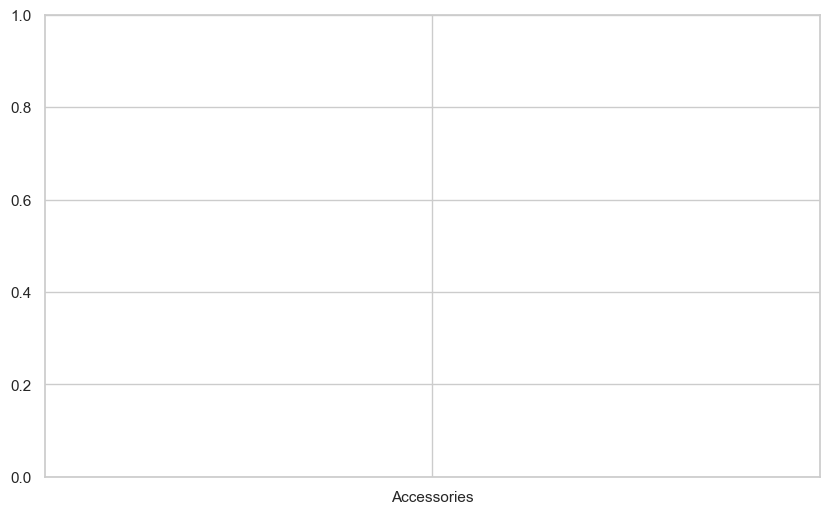

In [209]:
median = loc_en_dataset6.groupby("Product Name")[["Delivery Delay"]].median()
mean = loc_en_dataset6.groupby("Product Name")[["Delivery Delay"]].mean()
median.insert(loc=1, column="Delay Mean (in days)", value = mean)

plt.figure(figsize=(10, 6))
plt.scatter(median.index, median['Delivery Delay'], marker='o')

# Customize the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Product Name')
plt.ylabel('Delivery Delay')
plt.title('Product Name vs Delivery Delay')
plt.grid(True)

# Adjust layout to ensure labels are not cut off
plt.tight_layout()

# Show the plot
plt.show()

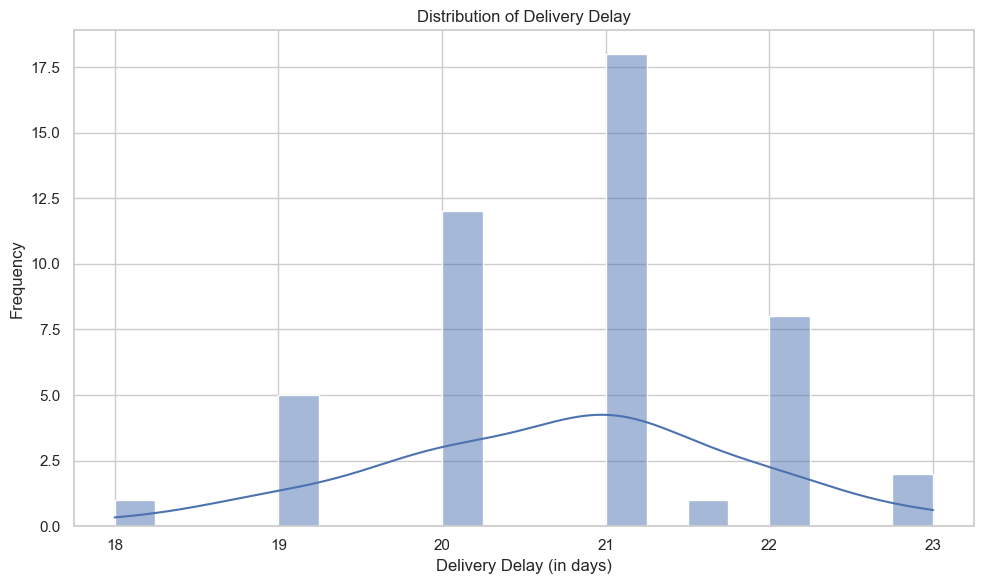

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the distribution plot for Delivery Delay
plt.figure(figsize=(10, 6))
sns.histplot(median['Delivery Delay'], kde=True, bins=20, color='b')

# Customize the plot
plt.xlabel('Delivery Delay (in days)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Delay')

# Show the plot
plt.tight_layout()
plt.show()


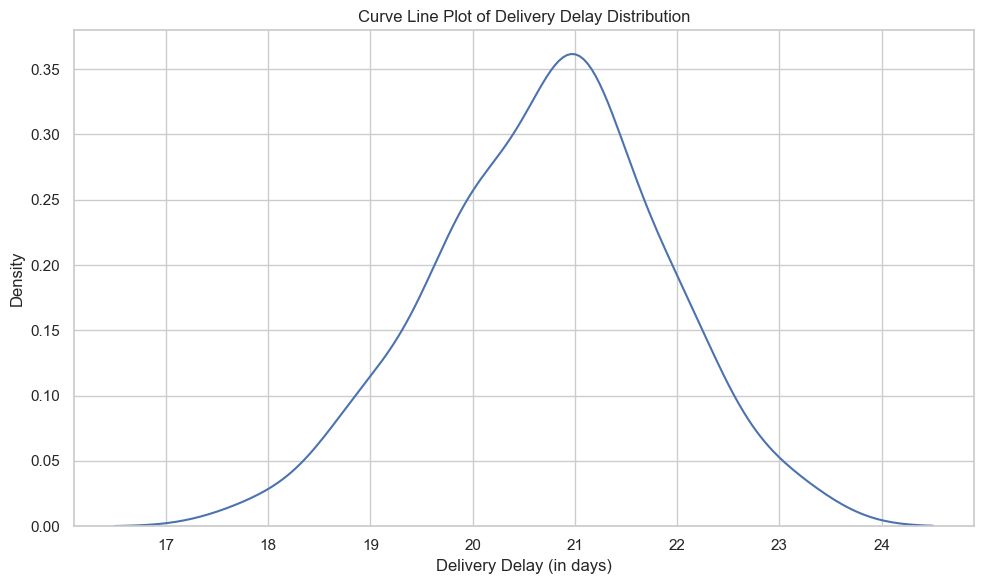

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a curve line plot using KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(median['Delivery Delay'], color='b', fill=False)  # fill=False removes shading

# Customize the plot
plt.xlabel('Delivery Delay (in days)')
plt.ylabel('Density')
plt.title('Curve Line Plot of Delivery Delay Distribution')

# Show the plot
plt.tight_layout()
plt.show()


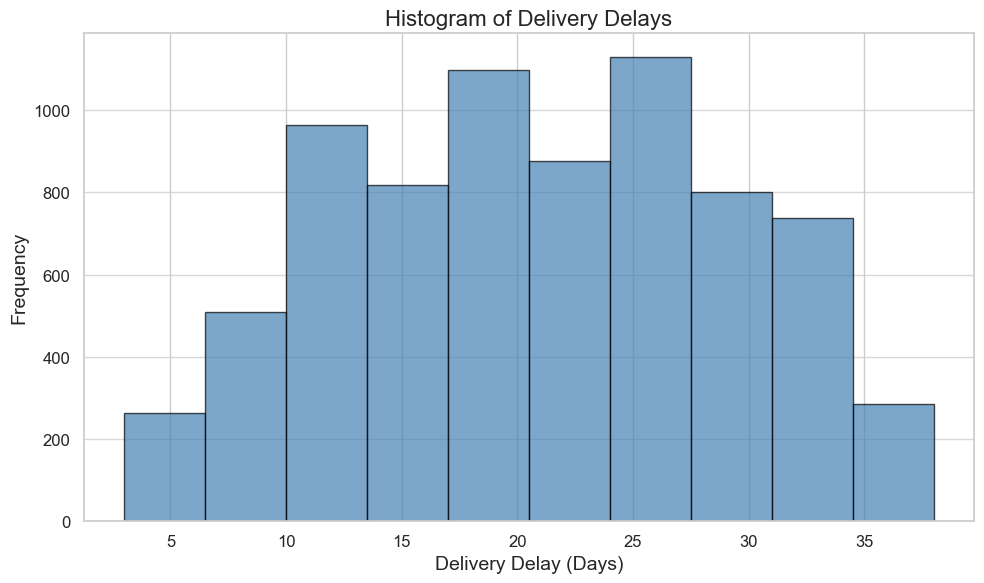

In [123]:
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(loc_en_dataset6["Delivery Delay"], bins=10, color='steelblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Delivery Delay (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Delivery Delays', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.tight_layout()
plt.show()

In [162]:
x = loc_en_dataset6[loc_en_dataset6["Delivery Delay"]>24]
y = x["Product Name"].unique()
y = list(y)
len(y)

47

In [163]:
loc_en_dataset6[loc_en_dataset6["Delivery Delay"]>24]

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,State_x,Population,Household Income,Median Income,Customer Names,Product Name,Region_x,Delivery Delay,Total Sales
1,SO - 000102,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,3.0,0.075,3939.6,3348.660,11818.8,Kansas,186515,74830,72463,Anonymous,Wreaths,Midwest,32,11818.8
2,SO - 000103,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,1.0,0.050,1775.5,781.220,1775.5,Michigan,117070,47179,55990,"3LAB, Ltd",Stemware,Midwest,31,1775.5
4,SO - 000105,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,8.0,0.100,1822.4,1476.144,14579.2,Connecticut,108802,40213,40467,Bare,Candles,Northeast,26,14579.2
7,SO - 000108,In-Store,2018-04-10,2018-05-31,2018-06-26,2018-07-01,5.0,0.050,1815.7,1525.188,9078.5,Ohio,388072,167100,26150,Ei,Sculptures,Midwest,31,9078.5
9,SO - 000110,In-Store,2017-12-31,2018-06-01,2018-06-29,2018-07-01,8.0,0.050,1956.4,1212.968,15651.2,New York,2636735,880727,32135,Trigen,Bakeware,Northeast,30,15651.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,SO - 0007570,Online,2020-06-18,2020-10-30,2020-11-27,2020-12-05,6.0,0.300,1755.4,877.700,10532.4,North Carolina,827097,305488,53637,Dharma Ltd,Outdoor Furniture,South,36,10532.4
7464,SO - 0007571,In-Store,2020-06-18,2020-10-30,2020-11-23,2020-11-24,4.0,0.050,1098.8,648.292,4395.2,California,121253,41216,57028,Procter Corp,Vases,West,25,4395.2
7467,SO - 0007574,In-Store,2020-06-18,2020-10-30,2020-11-23,2020-11-24,5.0,0.200,5152.3,2576.150,25761.5,North Carolina,159769,56034,91579,Llorens Ltd,Table Linens,South,25,25761.5
7471,SO - 0007578,In-Store,2020-09-26,2020-10-31,2020-11-17,2020-11-27,8.0,0.150,951.4,704.036,7611.2,New Jersey,102701,35198,90515,Eminence Corp,Cocktail Glasses,Northeast,27,7611.2


In [169]:
x = loc_en_dataset6[loc_en_dataset6["Delivery Delay"]==38]
y = x["Product Name"].unique()
y = list(y)
y

['Sculptures',
 'Rugs',
 'Table Lamps',
 'Stemware',
 'Wardrobes',
 'Candles',
 'Pillows',
 'Cocktail Glasses',
 'Dining Furniture',
 'Ornaments',
 'Dinnerware',
 'Collectibles',
 'Wine Storage',
 'Furniture Cushions',
 'Bean Bags',
 'Outdoor Furniture',
 'Vases',
 'Photo Frames',
 'Festive',
 'Mirrors',
 'Floral']

In [170]:
len(y)

21